In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model


In [2]:
df =pd.read_csv('homeprices.csv')

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [5]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [7]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
reg.intercept_

221323.00186540443

In [12]:
d = reg.predict(df[['area','bedrooms','age']])

In [13]:
df['predictions'] = d

In [14]:
df.head()

,area,bedrooms,age,price,predictions
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755


In [15]:
import matplotlib.pyplot as plt

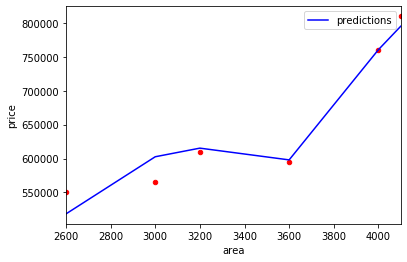

In [23]:
ax = plt.gca()
df.plot(kind = 'scatter',x = 'area',y='price',color = 'red',ax = ax)
df.plot(kind = 'line',x = 'area',y='predictions',color = 'blue',ax = ax)
plt.show()